# Histogram Equalization

Import required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import rgb2gray

#### Create histogram for image

In [2]:
def create_histogram(img):
    height = img.shape[0]
    width = img.shape[1]
    
    # create histogram as numpy array
    histogram = np.zeros(256)
    
    # looping over the image, pixel by pixel
    for i in range(0, height):
        for j in range(0, width):
            pixel_value = img[i,j] 
            histogram[pixel_value] += 1
    
    # normalize histogram values
    for i in range (0, len(histogram)):
        histogram[i] = (histogram[i] / (height*width))
    return histogram

#### Equalize histogram 

In [3]:
def histogram_eq (hist, img):
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    
    # cummilative sum over histogram to create cdf
    for i in range (1, len(hist)):
        cdf[i] = cdf[i-1] + hist[i]    
    
    height = img.shape[0]
    width = img.shape[1]
    
    for i in range(0, height):
        for j in range(0, width):
            current_intensity = img[i,j]
            new_intensity = cdf[current_intensity]
            img[i,j] = int(new_intensity*255)
    
    return img

### Implementing on CROWD.png thrice

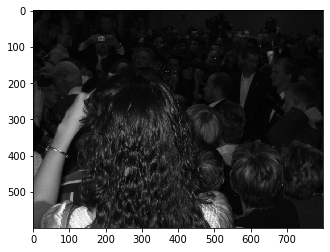

In [4]:
# Read the image and convert to grayscale
im = io.imread("crowd_grayscale.png")
im = rgb2gray(im)

# Convert the image to type uint8 and scale intensity values to the range 0-255
img1 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')

plt.imshow(img1, cmap="gray")

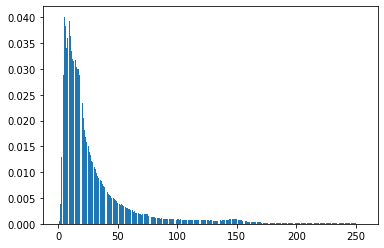

In [5]:
hist1 = create_histogram(img1)
plt.bar(np.arange(len(hist1)),hist1)
plt.show()

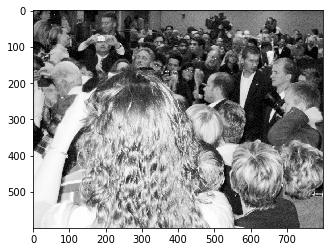

In [6]:
img2 = histogram_eq(hist1, img1)
plt.imshow(img2, cmap="gray")

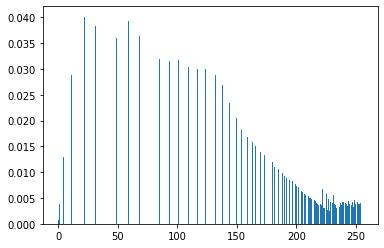

In [7]:
hist2 = create_histogram(img2)
plt.bar(np.arange(len(hist2)),hist2)
plt.show()

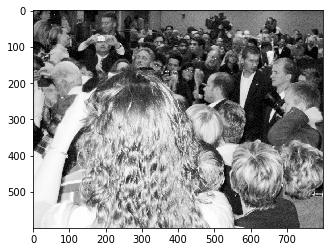

In [8]:
img3 = histogram_eq(hist2, img2)
plt.imshow(img3, cmap="gray")

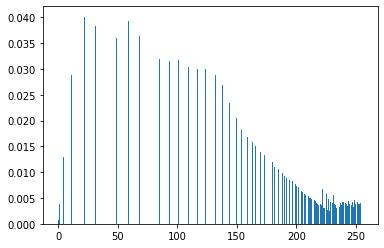

In [9]:
hist3 = create_histogram(img3)
plt.bar(np.arange(len(hist3)),hist3)
plt.show()

### Implementing on SELF image with low contrast 

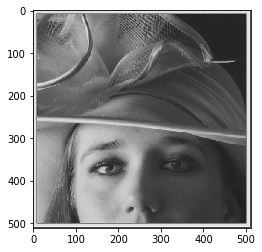

In [10]:
# Read the image and convert to grayscale
im = io.imread("lowcontrast_greyscale.jpg")
im = rgb2gray(im)

# Convert the image to type uint8 and scale intensity values to the range 0-255
self_img = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')

plt.imshow(self_img, cmap="gray")

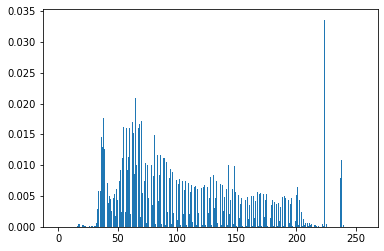

In [11]:
self_hist = create_histogram(self_img)
plt.bar(np.arange(len(self_hist)),self_hist)
plt.show()

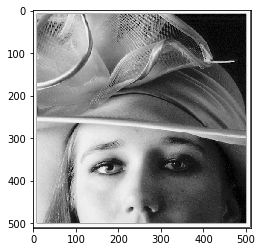

In [12]:
new_img = histogram_eq(self_hist, self_img)
plt.imshow(new_img, cmap="gray")

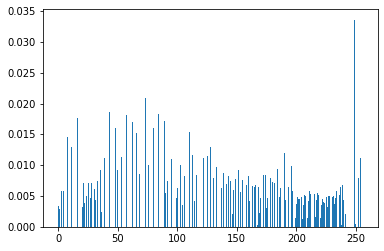

In [13]:
new_hist = create_histogram(new_img)
plt.bar(np.arange(len(new_hist)),new_hist)
plt.show()